# Checking spin up of CCLM soil temperature 

quick and dirty

In [1]:
import valenspy as vp

import xarray as xr
from pathlib import Path
import cdo 
from yaml import safe_load
import os
from eval_functions import *
import warnings

# Turn off all warnings
warnings.filterwarnings('ignore')

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# postprocessing base directory 
postproc_base_dir = "/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/"

src_path = Path("../src/valenspy")


In [2]:

# reference dataset to compare to
model = 'CCLM'

# get lookup file for model
with open(src_path / "ancilliary_data" / Path(model+"_lookup.yml")) as file:
    mod_LOOKUP = safe_load(file)

# secondary list of variables to compare
# cloud characteristics (integrated cloud water, ice, graupel, snow and rain) (NOT YET IN CORDEX_VARIABLES list)
# ERA5-land: surface fluxes: latent heat, sensible heat




### 1. Load CCLM diurnal cycle

In [3]:
# directory with experiments


experiments = ["EUR11_CO_TA_GC_TSO"]
experiment = experiments[0]

In [4]:
# open COSMO data
mod_var = "T_SO"
ds_mod = xr.open_dataset(f"/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/{experiment}/{mod_var}/{mod_var}_daymean.nc")
da = ds_mod[mod_var]

In [5]:
da

<xarray.DataArray 'T_SO' (time: 123, soil1: 10, rlat: 434, rlon: 446)> Size: 952MB
[238083720 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 984B 1995-05-01T11:30:00 ... 1995-08-31T08...
    lon      (rlat, rlon) float32 774kB ...
    lat      (rlat, rlon) float32 774kB ...
  * rlon     (rlon) float32 2kB -29.58 -29.48 -29.36 ... 19.15 19.25 19.36
  * rlat     (rlat) float32 2kB -24.58 -24.48 -24.36 ... 22.83 22.93 23.05
  * soil1    (soil1) float32 40B 0.005 0.025 0.07 0.16 ... 1.42 2.86 5.74 11.5
Attributes:
    standard_name:  soil_temperature
    long_name:      soil temperature
    units:          K
    grid_mapping:   rotated_pole
    cell_methods:   time: point

In [8]:
# do selection of individual points (do this in separate notebook.)
# Define the coordinates
d_point_coords = {
    'opwijk'    : (4.18, 50.97), 
    'betrix'    : (5.25, 49.854),
    'north_sea' : (2.465, 51.63),
    'channel'   : (-1.05, 50.14)
}
point_id = 'opwijk'
point_coord = d_point_coords[point_id]


months_to_analyse = [5,6,7,8]


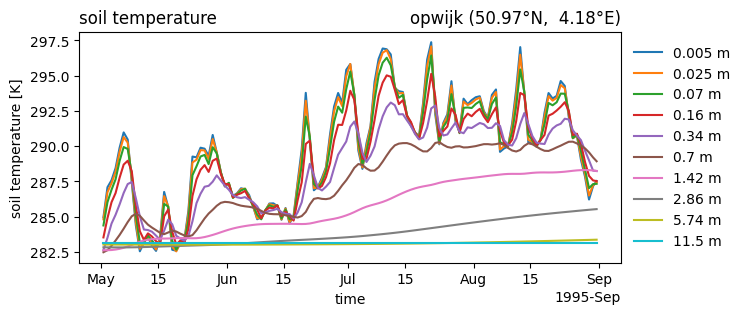

In [23]:
# generate path of CCLM output

# dictorionary to save data arrays of experiments
d_da_mod_point = {}

# get CCLM variable corresponding to the requested variable using its look-up table

# define the path
directory = Path(postproc_base_dir + experiment +'/'+mod_var + '/')

# open the CCLM file for the corresponding variable
mod_files = list(directory.glob(mod_var+"_daymean.nc")) # Select all the netCDF files in the directory

if not mod_files:  # empty list - move to next element in loop
    print(f"{variable} not available for {experiment}")

ds_mod = xr.open_mfdataset(mod_files, combine="by_coords", chunks="auto")

coord_points_rotated = geo_to_rot(point_coord, ds_mod)
ds_mod_point = ds_mod.sel(rlon = coord_points_rotated[0], rlat = coord_points_rotated[1], method='nearest')

da_mod_point = ds_mod_point[mod_var].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))

d_da_mod_point[experiment] = da_mod_point

fig, ax = plt.subplots(figsize = (7,3))


for soil_level in da_mod_point.soil1: 

    da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
    ax.set_title(da_mod_point.attrs['long_name'], loc='left')



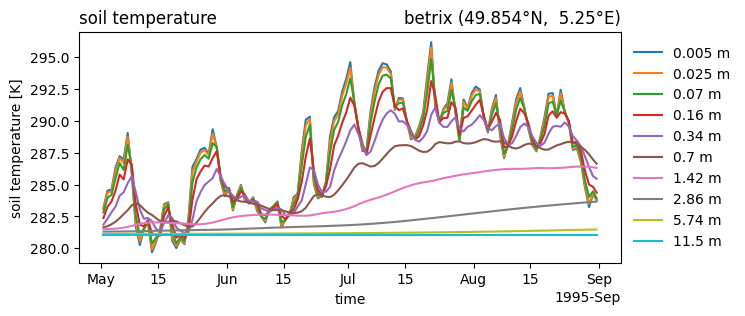

In [25]:
# generate path of CCLM output
point_id = 'betrix'
point_coord = d_point_coords[point_id]
# dictorionary to save data arrays of experiments
d_da_mod_point = {}

# get CCLM variable corresponding to the requested variable using its look-up table

# define the path
directory = Path(postproc_base_dir + experiment +'/'+mod_var + '/')

# open the CCLM file for the corresponding variable
mod_files = list(directory.glob(mod_var+"_daymean.nc")) # Select all the netCDF files in the directory

if not mod_files:  # empty list - move to next element in loop
    print(f"{variable} not available for {experiment}")

ds_mod = xr.open_mfdataset(mod_files, combine="by_coords", chunks="auto")

coord_points_rotated = geo_to_rot(point_coord, ds_mod)
ds_mod_point = ds_mod.sel(rlon = coord_points_rotated[0], rlat = coord_points_rotated[1], method='nearest')

da_mod_point = ds_mod_point[mod_var].sel(time=ds_mod['time'].dt.month.isin(months_to_analyse))

d_da_mod_point[experiment] = da_mod_point

fig, ax = plt.subplots(figsize = (7,3))


for soil_level in da_mod_point.soil1: 

    da_mod_point.sel(soil1=soil_level).plot(ax = ax, label=str(soil_level.values)+' m')
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_title(' ', loc='center')
    ax.set_title(f"{point_id} ({point_coord[1]}°N,  {point_coord[0]}°E)", loc='right');
    ax.set_title(da_mod_point.attrs['long_name'], loc='left')

